In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv(r"C:\Users\J.NAGA NANDINI DEVI\OneDrive\Desktop\thyroidDF.csv")

In [3]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
data.shape

(9172, 31)

In [5]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [6]:
#Removing Redundant attributes from dataset
data.drop(columns=['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'],inplace=True)

In [7]:
#re-mapping target values to diagnostic group
diagnoses={
    'A':'hyperthyroid conditions',
    'B':'hyperthyroid conditions',
    'C':'hyperthyroid conditions',
    'D':'hyperthyroid conditions',
    'E':'hypothyroid conditions',
    'F':'hypothyroid conditions',
    'G':'hypothyroid conditions',
    'H':'hypothyroid conditions',
    'I':'binding protein',
    'J':'binding protein',
    'K':'general health',
    'L':'replacement therapy',
    'M':'replacement therapy',
    'N':'replacement therapy',
    'O':'antithyroid treatment',
    'P':'antithyroid treatment',
    'Q':'antithyroid treatment',
    'R':'miscellaneous',
    'S':'miscellaneous',
    'T':'miscellaneous'
}
data['target']=data['target'].map(diagnoses)

In [8]:
data.dropna(subset=['target'],inplace=True)

In [9]:
data['target'].value_counts()

hypothyroid conditions     593
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    182
antithyroid treatment       33
Name: target, dtype: int64

In [10]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2237.000000,2087.000000,1643.000000,2140.000000,2059.000000,2060.000000,98.000000
mean,52.792579,14.930791,1.961875,116.390495,1.013439,120.363369,47.717347
std,19.677450,46.204092,1.452238,60.351600,0.280222,70.996728,32.398750
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,9.299999
25%,36.000000,0.255000,1.000000,76.000000,0.850000,83.000000,32.000000
50%,56.000000,2.000000,1.700000,109.000000,0.960000,109.000000,36.000000
75%,69.000000,8.799999,2.500000,156.000000,1.120000,157.000000,46.750000
max,95.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   int64  
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [12]:
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [13]:
#changing age of observation with(age>100) to null
data['age']=np.where((data.age>100),np.nan,data.age)

In [14]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid conditions
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN,general health
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN,general health
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN,binding protein
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN,binding protein


In [15]:
#splitting the data values as x and y
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [16]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN


In [17]:
y

4                miscellaneous
18      hypothyroid conditions
32               miscellaneous
33             binding protein
39         replacement therapy
                 ...          
9153            general health
9157            general health
9158           binding protein
9162           binding protein
9169           binding protein
Name: target, Length: 2237, dtype: object

In [18]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [19]:
x['sex'].replace(np.nan,'F',inplace=True)

In [20]:
x['sex'].value_counts()

F    1701
M     536
Name: sex, dtype: int64

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2237 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [22]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

In [23]:
#Encoding the categorical data
#Encoding the independent(output) variable
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal_encoder=OrdinalEncoder(dtype='int64')
x.iloc[:,1:16]=ordinal_encoder.fit_transform(x.iloc[:,1:16])
#ordinal_encoder.fit_transform(x[['sex']])

In [24]:
x.replace(np.nan,'0',inplace=True)

In [25]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.81,0,31.0,0.55,56.0,0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.18,0,28.0,0.87,32.0,0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,44.0,0.53,83.0,0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,84.0,1.26,67.0,0


In [26]:
label_encoder=LabelEncoder()
y_dt=label_encoder.fit_transform(y)

In [27]:
y=pd.DataFrame(y_dt,columns=['target'])

In [28]:
y

,target
0,5
1,4
2,5
3,1
4,6
...,...
2232,2
2233,2
2234,1
2235,1


<Axes: >

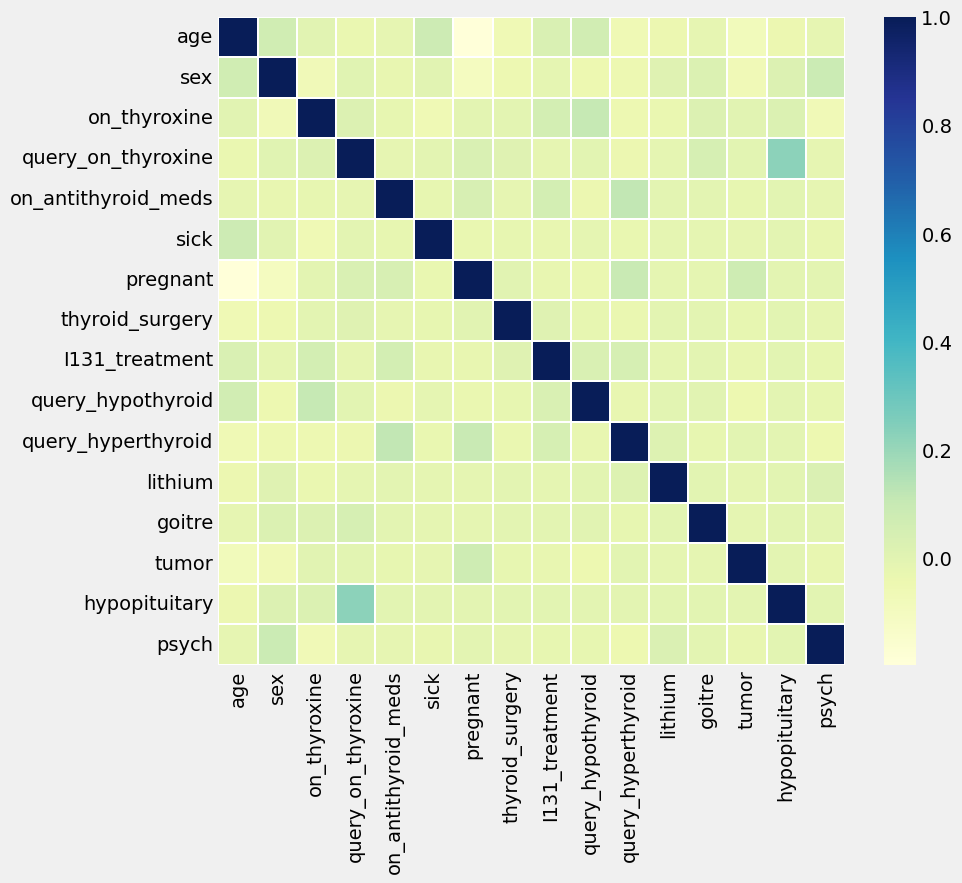

In [29]:
import seaborn as sns
corrmat=x.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidths=0.1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [31]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

target
4         471
2         351
1         302
6         265
5         230
3         144
0          26
dtype: int64

In [32]:
os=SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [33]:
#applying Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_test_bal=sc.transform(x_test_bal)

In [34]:
x_bal

array([[-1.62721505, -0.44060477, -0.4238    , ..., -2.50870684,
        -1.40088079,  3.29445097],
       [-0.11561403, -0.44060477,  2.35960359, ..., -0.26259147,
         0.0720981 , -0.19494049],
       [ 1.1874903 ,  2.26960776, -0.4238    , ...,  0.17039463,
        -0.19352104, -0.19494049],
       ...,
       [ 1.395987  , -0.44060477,  2.35960359, ...,  0.43615031,
         0.06101022, -0.19494049],
       [ 0.72802783, -0.44060477,  2.35960359, ...,  0.143333  ,
         0.89086631, -0.19494049],
       [ 1.15628145, -0.44060477,  2.35960359, ...,  0.39723515,
        -0.26588659, -0.19494049]])

In [36]:
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']

In [37]:
x_test_bal=pd.DataFrame(x_test_bal,columns=columns)

In [38]:
x_bal=pd.DataFrame(x_bal,columns=columns)

In [39]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-1.627215,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.115614,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,1.187490,2.269608,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-1.366594,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,7.283487,-0.024637,-0.107982,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,-0.167738,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,0.546923,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.114424,0.343221,-0.148122,-0.146517,0.040168,-0.194940
3293,0.383062,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.309176,-0.856540,0.565143,-0.513902,1.085434,-0.194940
3294,1.395987,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.095452,-0.172405,0.248906,0.436150,0.061010,-0.194940
3295,0.728028,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.311566,0.087864,1.071643,0.143333,0.890866,-0.194940


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rfr=RandomForestClassifier().fit(x_bal,y_bal)
y_pred=rfr.predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape

((3297, 22), (3297, 1), (854, 22), (854, 1))

In [41]:
test_score=accuracy_score(y_test_bal,y_pred)

In [42]:
test_score

0.9074941451990632

In [43]:
train_score=accuracy_score(y_bal,rfr.predict(x_bal))
train_score

1.0

In [44]:
#performing feature importance
from sklearn.inspection import permutation_importance
results=permutation_importance(rfr,x_bal,y_bal,scoring='accuracy')


feature:age                  Score: 0.0
feature:sex                  Score: 0.0
feature:on_thyroxine         Score: 0.0
feature:query_on_thyroxine   Score: 0.0
feature:on_antithyroid_meds  Score: 0.0
feature:sick                 Score: 6.066120715801926e-05
feature:pregnant             Score: 6.066120715801926e-05
feature:thyroid_surgery      Score: 0.0003033060357900963
feature:I131_treatment       Score: 0.0005459508644221733
feature:query_hypothyroid    Score: 0.0007279344858962311
feature:query_hyperthyroid   Score: 0.0012132241431604962
feature:lithium              Score: 0.0017591750075826695
feature:goitre               Score: 0.005520169851380041
feature:tumor                Score: 0.009766454352441634
feature:hypopituitary        Score: 0.01413406126781922
feature:psych                Score: 0.04877161055505006
feature:TSH                  Score: 0.050288140734000605
feature:T3                   Score: 0.06909311495298756
feature:TT4                  Score: 0.1510464058234759


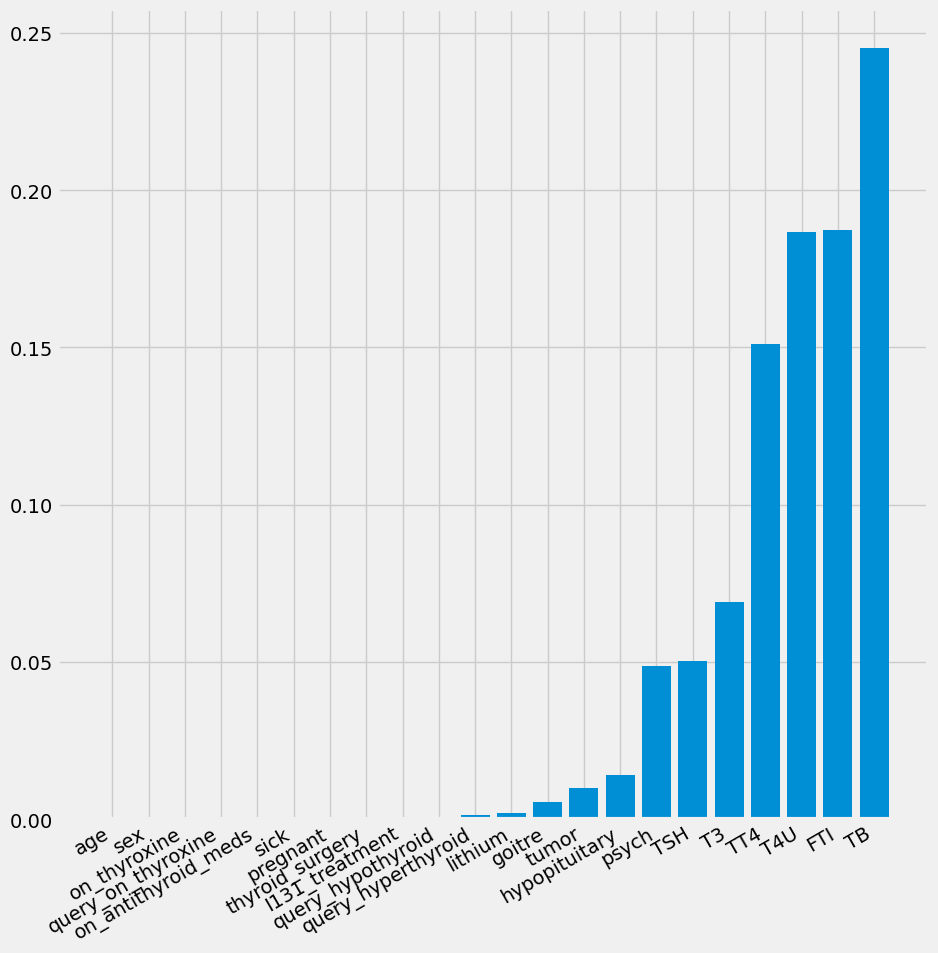

In [45]:
#gets importance
feature_importance=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TB']
importance=results.importances_mean
importance=np.sort(importance)

#summerize feature importance
for i,v in enumerate(importance):
    i=feature_importance[i]
    print('feature:{:<20} Score: {}'.format(i,v))
    
#plot important feature

plt.figure(figsize=(10,10))
plt.bar(x=feature_importance,height=importance)
plt.xticks(rotation=30,ha='right')
plt.show()

In [46]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0


In [47]:
x_bal=x_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium'],axis=1)
x_bal

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.052319,-0.137297,-0.024637,-0.107982,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.052319,-0.137297,-0.024637,-0.107982,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,-0.052319,-0.137297,-0.024637,-0.107982,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-0.052319,7.283487,-0.024637,-0.107982,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,-0.052319,-0.137297,-0.024637,-0.107982,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940
...,...,...,...,...,...,...,...,...,...,...
3292,-0.052319,-0.137297,-0.024637,-0.107982,-0.114424,0.343221,-0.148122,-0.146517,0.040168,-0.194940
3293,-0.052319,-0.137297,-0.024637,-0.107982,-0.309176,-0.856540,0.565143,-0.513902,1.085434,-0.194940
3294,-0.052319,-0.137297,-0.024637,-0.107982,-0.095452,-0.172405,0.248906,0.436150,0.061010,-0.194940
3295,-0.052319,-0.137297,-0.024637,-0.107982,-0.311566,0.087864,1.071643,0.143333,0.890866,-0.194940


In [48]:
x_test_bal=x_test_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium'],axis=1)
x_test_bal

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.052319,-0.137297,-0.024637,-0.107982,-0.312412,0.593872,0.788014,1.063428,0.132466,-0.19494
1,-0.052319,-0.137297,-0.024637,-0.107982,-0.314240,0.781860,0.444674,1.767031,-0.302183,-0.19494
2,-0.052319,-0.137297,-0.024637,-0.107982,1.298911,-0.408731,-1.227244,-0.397900,-0.905863,-0.19494
3,-0.052319,-0.137297,-0.024637,-0.107982,-0.166205,-0.471394,-0.227079,-0.397900,0.132466,-0.19494
4,-0.052319,-0.137297,-0.024637,-0.107982,-0.227125,-0.346068,-0.301718,-0.830886,0.434306,-0.19494
...,...,...,...,...,...,...,...,...,...,...
849,-0.052319,-0.137297,-0.024637,-0.107982,-0.083816,-1.035358,-0.107617,0.233658,-0.122115,-0.19494
850,-0.052319,-0.137297,-0.024637,-0.107982,-0.243619,-0.617696,0.704248,0.158364,0.565101,-0.19494
851,-0.052319,-0.137297,-0.024637,-0.107982,-0.309051,-1.006042,1.489762,0.818355,0.700942,-0.19494
852,-0.052319,-0.137297,-0.024637,-0.107982,-0.307669,-0.818014,1.451967,0.819874,0.673276,-0.19494


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfr1=RandomForestClassifier().fit(x_bal,y_bal.values.ravel())
y_pred=rfr1.predict(x_test_bal)
rfr1=RandomForestClassifier()

In [50]:
rfr1.fit(x_bal,y_bal.values.ravel())

RandomForestClassifier()

In [51]:
y_pred=rfr1.predict(x_test_bal)
y_pred

array([1, 1, 4, 2, 2, 1, 5, 6, 3, 2, 6, 6, 3, 1, 3, 2, 4, 2, 4, 4, 4, 4,
       1, 2, 4, 3, 2, 3, 3, 4, 1, 4, 1, 4, 2, 4, 6, 4, 4, 4, 5, 4, 3, 1,
       3, 5, 1, 2, 4, 2, 2, 6, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 6, 5, 1, 4,
       0, 6, 4, 3, 6, 4, 2, 4, 5, 4, 2, 5, 1, 1, 4, 2, 6, 2, 1, 5, 2, 1,
       2, 4, 3, 4, 3, 2, 4, 3, 2, 6, 2, 6, 4, 2, 4, 1, 1, 6, 2, 4, 1, 1,
       3, 5, 1, 1, 6, 1, 5, 6, 4, 3, 2, 2, 2, 2, 4, 3, 4, 2, 4, 6, 2, 4,
       1, 4, 2, 1, 6, 4, 1, 6, 5, 3, 2, 2, 2, 1, 4, 1, 5, 2, 5, 5, 3, 4,
       1, 1, 3, 2, 6, 3, 2, 3, 3, 2, 2, 1, 6, 1, 4, 4, 6, 5, 1, 2, 1, 2,
       1, 4, 4, 6, 4, 2, 6, 2, 3, 1, 4, 5, 2, 1, 4, 2, 2, 1, 1, 4, 2, 4,
       3, 4, 1, 6, 3, 6, 5, 6, 2, 6, 5, 4, 4, 6, 5, 5, 5, 3, 4, 6, 1, 1,
       2, 3, 4, 3, 4, 6, 4, 4, 1, 4, 4, 3, 1, 5, 6, 4, 2, 3, 4, 4, 6, 5,
       5, 4, 4, 1, 2, 6, 1, 5, 4, 4, 2, 4, 6, 0, 6, 4, 2, 1, 0, 4, 4, 2,
       4, 4, 3, 6, 6, 2, 5, 2, 2, 1, 1, 6, 5, 1, 1, 4, 2, 3, 2, 1, 2, 6,
       1, 4, 4, 3, 4, 4, 4, 1, 6, 4, 5, 3, 6, 6, 6,

In [52]:
print(classification_report(y_test_bal,y_pred))
print(accuracy_score(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.17      0.29       122
           1       0.80      0.94      0.86       122
           2       0.93      0.99      0.96       122
           3       0.76      0.81      0.78       122
           4       0.48      0.87      0.62       122
           5       0.88      0.66      0.76       122
           6       0.56      0.51      0.53       122

    accuracy                           0.71       854
   macro avg       0.75      0.71      0.69       854
weighted avg       0.75      0.71      0.69       854

0.7084309133489461


In [53]:
train_score=accuracy_score(y_bal,rfr1.predict(x_bal))
train_score

1.0

In [54]:
#XGB Classifier
from xgboost import XGBClassifier
xgb1=XGBClassifier()
xgb1.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [55]:
y_pred=xgb1.predict(x_test_bal)

In [56]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.30      0.44       122
           1       0.82      0.94      0.88       122
           2       0.96      1.00      0.98       122
           3       0.77      0.84      0.81       122
           4       0.51      0.81      0.62       122
           5       0.84      0.70      0.76       122
           6       0.59      0.54      0.56       122

    accuracy                           0.73       854
   macro avg       0.76      0.73      0.72       854
weighted avg       0.76      0.73      0.72       854



In [57]:
accuracy_score(y_test_bal,y_pred)

0.734192037470726

In [58]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
sv=SVC()

In [59]:
sv.fit(x_bal,y_bal)

SVC()

In [60]:
y_pred=sv.predict(x_test_bal)

In [61]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       122
           1       0.76      0.81      0.79       122
           2       0.88      0.93      0.90       122
           3       0.71      0.65      0.68       122
           4       0.71      0.63      0.67       122
           5       0.76      0.54      0.63       122
           6       0.49      0.57      0.52       122

    accuracy                           0.71       854
   macro avg       0.72      0.71      0.71       854
weighted avg       0.72      0.71      0.71       854



In [62]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

0.7154989384288747

In [63]:
test_score=accuracy_score(y_test_bal,y_pred)
test_score

0.7107728337236534

In [64]:
params={
    'C':[0.1,1,10,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf','sqrt']
}

In [65]:
from sklearn.model_selection import RandomizedSearchCV
random_svc=RandomizedSearchCV(sv,params,scoring='accuracy',cv=5,n_jobs=-1)

In [66]:
random_svc.fit(x_bal,y_bal)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'sqrt']},
                   scoring='accuracy')

In [67]:
random_svc.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}

In [68]:
sv1=SVC(kernel='rbf',gamma=0.1,C=100)

In [69]:
sv1.fit(x_bal,y_bal)

SVC(C=100, gamma=0.1)

In [70]:
y_pred=sv1.predict(x_test_bal)
y_pred

array([1, 1, 4, 2, 2, 1, 5, 6, 3, 2, 4, 6, 3, 1, 6, 2, 4, 2, 4, 4, 4, 4,
       1, 2, 4, 3, 2, 3, 6, 4, 1, 4, 1, 4, 2, 4, 0, 4, 4, 4, 6, 4, 3, 1,
       6, 4, 1, 2, 4, 2, 2, 6, 2, 4, 2, 0, 2, 2, 4, 2, 0, 4, 6, 5, 1, 4,
       0, 5, 4, 3, 6, 4, 2, 0, 5, 4, 2, 5, 3, 1, 4, 2, 5, 2, 1, 5, 2, 1,
       2, 4, 3, 0, 3, 2, 4, 3, 4, 6, 2, 5, 4, 2, 4, 1, 1, 6, 2, 0, 1, 1,
       3, 0, 1, 1, 5, 1, 5, 5, 4, 3, 2, 2, 2, 2, 4, 3, 4, 2, 0, 5, 2, 4,
       1, 0, 2, 1, 1, 4, 1, 6, 5, 3, 2, 2, 2, 1, 4, 1, 5, 2, 5, 5, 6, 4,
       1, 1, 1, 2, 6, 3, 2, 6, 5, 1, 2, 1, 6, 3, 4, 4, 6, 5, 1, 2, 1, 2,
       1, 4, 4, 6, 0, 2, 6, 2, 3, 1, 4, 5, 2, 1, 0, 2, 2, 1, 3, 4, 2, 4,
       3, 4, 1, 0, 3, 3, 5, 6, 2, 5, 5, 4, 0, 6, 5, 5, 5, 3, 0, 5, 1, 1,
       2, 6, 4, 3, 4, 5, 4, 4, 1, 4, 4, 3, 1, 6, 6, 4, 2, 3, 4, 4, 5, 3,
       5, 0, 6, 3, 2, 5, 1, 5, 4, 4, 2, 4, 6, 0, 6, 4, 2, 4, 4, 0, 4, 0,
       4, 0, 3, 4, 6, 4, 5, 1, 2, 1, 1, 5, 6, 1, 3, 0, 0, 5, 2, 1, 0, 0,
       1, 4, 4, 3, 0, 0, 4, 1, 6, 0, 5, 3, 6, 5, 6,

In [71]:
print(classification_report(y_test_bal,y_pred))
print(accuracy_score(y_test_bal,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.75      0.75       122
           1       0.77      0.86      0.81       122
           2       0.95      0.91      0.93       122
           3       0.70      0.66      0.68       122
           4       0.66      0.73      0.70       122
           5       0.72      0.72      0.72       122
           6       0.57      0.48      0.52       122

    accuracy                           0.73       854
   macro avg       0.73      0.73      0.73       854
weighted avg       0.73      0.73      0.73       854

0.7318501170960188


In [72]:
train_score=accuracy_score(y_bal,sv1.predict(x_bal))
train_score

0.8125568698817106

In [73]:
#saving the model
import pickle
pickle.dump(sv1,open('thyroid_2_model.pkl','wb'))


In [74]:
features=np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])
print(label_encoder.inverse_transform(xgb1.predict(features)))


['hypothyroid conditions']


In [75]:
pickle.dump(label_encoder,open('label_encoder2.pkl','wb'))

In [76]:
data['target'].unique()

array(['miscellaneous', 'hypothyroid conditions', 'binding protein',
       'replacement therapy', 'general health', 'hyperthyroid conditions',
       'antithyroid treatment'], dtype=object)

In [78]:
y['target'].unique()

array([5, 4, 1, 6, 2, 3, 0])